In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
sb.set()

from dython.nominal import associations
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df_train1 = pd.read_csv('df_train1.csv')
df_test1 = pd.read_csv('df_test1.csv')

In [3]:
df_train1 = df_train1.drop(columns=['Unnamed: 0'])
df_test1 = df_test1.drop(columns=['Unnamed: 0'])

# Building Model

Since our problem requires a prediction of risk of serious delinquency, which is a type of categorical data in our dataset, we will be using **classification** models. We will be using decision tree classification model and AdaBoost model for our prediction.

In [4]:
df_train1.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0               No                              0.046715  33.0   
1               No                              0.423036  68.0   
2               No                              0.436504  48.0   
3               No                              0.332637  43.0   
4               No                              1.000000  38.0   

   NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0                                   1.0    0.376381         6333.0   
1                                   0.0    0.139735         4300.0   
2                                   0.0  983.000000         5400.0   
3                                   0.0    0.151061         8340.0   
4                                   0.0    0.359082         4750.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                             15.0                      0.0   
1                              6.0                      0.0   
2                              3.0                      0.0   
3                              9.0                      0.0   
4                              4.0                      0.0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                           2.0                                   0.0   
1                           1.0                                   0.0   
2                           1.0                                   0.0   
3                           0.0                                   0.0   
4                           2.0                                   0.0   

   NumberOfDependents  
0                 1.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 2.0

In [5]:
df_test1.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0               No                              0.644226  30.0   
1               No                              0.010352  46.0   
2               No                              0.548458  64.0   
3               No                              0.602794  25.0   
4              Yes                              0.025656  38.0   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                   0.0   0.309476         2500.0   
1                                   0.0   0.298354        12454.0   
2                                   0.0   0.209892        11362.0   
3                                   0.0   0.065868          333.0   
4                                   0.0   0.475841         3000.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                              5.0                      0.0   
1                             13.0                      0.0   
2                              7.0                      0.0   
3                              2.0                      0.0   
4                              7.0                      0.0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                           0.0                                   0.0   
1                           2.0                                   0.0   
2                           1.0                                   0.0   
3                           0.0                                   0.0   
4                           1.0                                   0.0   

   NumberOfDependents  
0                 0.0  
1                 2.0  
2                 2.0  
3                 0.0  
4                 2.0

## Decision Tree

In [6]:
def positive_rate(p1, p2):
    TN = p1[0]
    FP = p1[1]
    FN = p2[0]
    TP = p2[1]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    TNR = TN/(FP+TN)
    FNR = FN/(FN+TP)
    return (TPR, FPR, TNR, FNR)

In [7]:
def dec_tree(x_name, y_name, df_train, df_test, depth, show_info=True):
    # Prepare Test and Test
    X_train = df_train[x_name]
    X_test = df_test[x_name]
    y_train = df_train[[y_name]]
    y_test = df_test[[y_name]]
    
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree = dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict values using model
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    cm_df_train = confusion_matrix(y_train, y_train_pred)
    (train_TN, train_FP), (train_FN, train_TP) = cm_df_train
    (train_TPR, train_FPR, train_TNR, train_FNR) = positive_rate((train_TN, train_FP), (train_FN, train_TP))
    
    cm_df_test = confusion_matrix(y_test, y_test_pred)
    (test_TN, test_FP), (test_FN, test_TP) = cm_df_test
    (test_TPR, test_FPR, test_TNR, test_FNR) = positive_rate((test_TN, test_FP), (test_FN, test_TP))
    
    train_score = dectree.score(X_train, y_train)
    test_score = dectree.score(X_test, y_test)
    
    if(show_info):
        # Check the Goodness of Fit (on Train Data)
        print("Predict {} using {} with max depth = {}\n".format(y_name, x_name, depth))
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Classification Accuracy \t:", train_score)
        print("True Positive Rate \t\t:", train_TPR)
        print("False Positive Rate \t\t:", train_FPR)
        print("True Negative Rate \t\t:", train_TNR)
        print("False Negative Rate \t\t:", train_FNR)
        print()

        # Check the Goodness of Fit (on Test Data)
        print("Goodness of Fit of Model \tTest Dataset")
        print("Classification Accuracy \t:", test_score)
        print("True Positive Rate \t\t:", test_TPR)
        print("False Positive Rate \t\t:", test_FPR)
        print("True Negative Rate \t\t:", test_TNR)
        print("False Negative Rate \t\t:", test_FNR)
        print()

        # Plot the Confusion Matrix for Train and Test
        f = plt.figure(figsize = (22, 10))
        plot_tree(dectree)
    
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        sb.heatmap(cm_df_train,
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        sb.heatmap(cm_df_test, 
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        axes[0].set(xlabel="Train Dataset")
        axes[1].set(xlabel="Test Dataset")
        plt.show()
    
    return (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR)

### Overfitting Curve
Testing Decision Tree at Different Depths

In [8]:
target_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [9]:
arr = []
overfitting_arr = []
depths = [i for i in range(2, 20)]
for i in depths:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = dec_tree(target_cols, 'SeriousDlqin2yrs', df_train1, df_test1, i, show_info=False)
    arr.append({"Max Depth": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Max Depth": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Max Depth", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Accuracy Rate by Max Depth", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Max Depth", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Overfitting Curve", font=dict(size=14)))
fig.show()

**Since the accuracy and positive rate for the `SeriousDlqin2yrs` of the test dataset is most optimal at max depth 5, we will be using the decision tree with the max depth 5.**

Predict SeriousDlqin2yrs using ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with max depth = 5

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9371333333333334
True Positive Rate 		: 0.2089236887894606
False Positive Rate 		: 0.010531110992014578
True Negative Rate 		: 0.9894688890079855
False Negative Rate 		: 0.7910763112105395

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9362666666666667
True Positive Rate 		: 0.19090909090909092
False Positive Rate 		: 0.011063526052819414
True Negative Rate 		: 0.9889364739471805
False Negative Rate 		: 0.8090909090909091



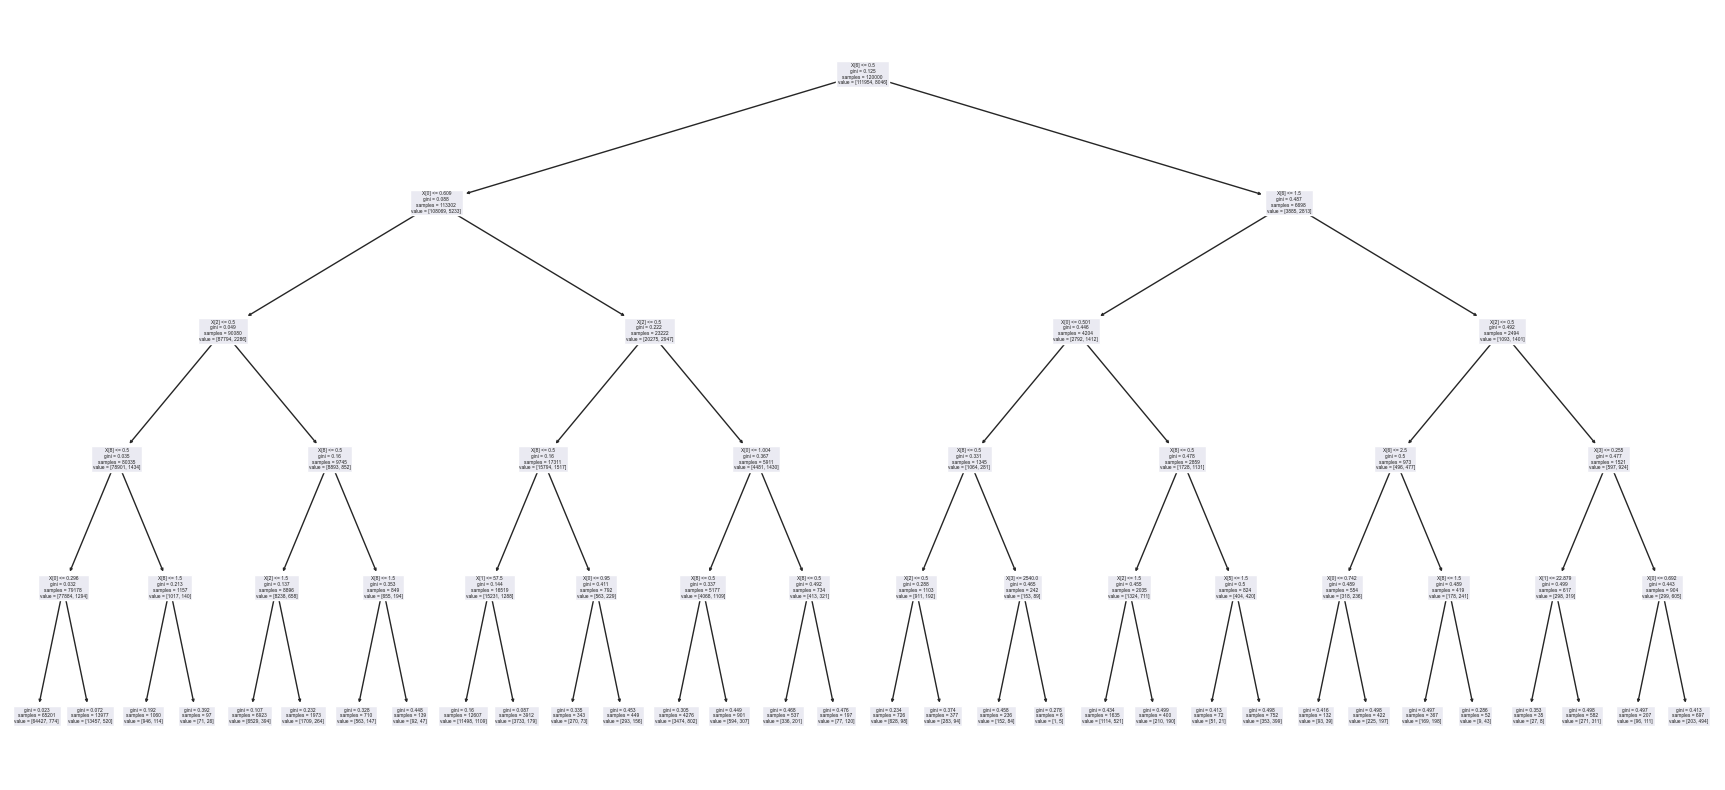

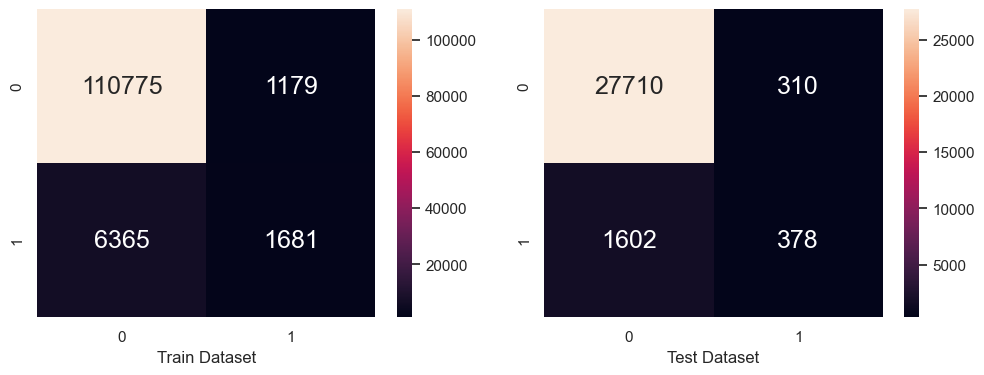

In [10]:
a = dec_tree(target_cols, 'SeriousDlqin2yrs', df_train1, df_test1, 5)

**Dropping those columns with insignificant correlation (less than 0.1 with `SeriousDlqin2yrs`) to see if it improve the model**

Predict SeriousDlqin2yrs using ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] with max depth = 5

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9368333333333333
True Positive Rate 		: 0.16927665920954513
False Positive Rate 		: 0.008003287064329992
True Negative Rate 		: 0.99199671293567
False Negative Rate 		: 0.8307233407904548

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9361
True Positive Rate 		: 0.147979797979798
False Positive Rate 		: 0.00820842255531763
True Negative Rate 		: 0.9917915774446824
False Negative Rate 		: 0.852020202020202



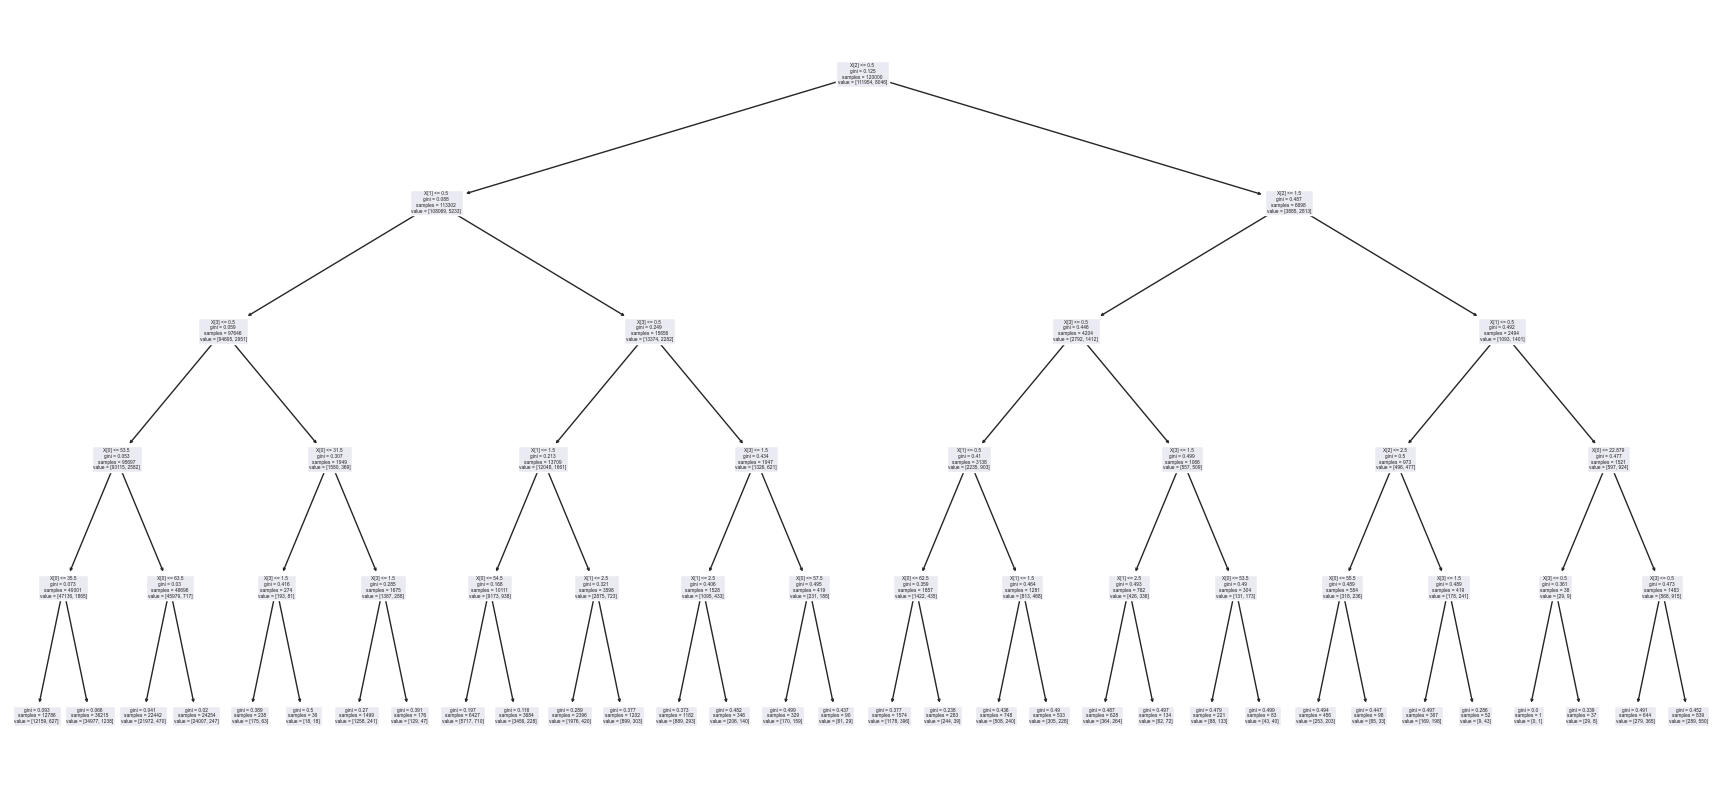

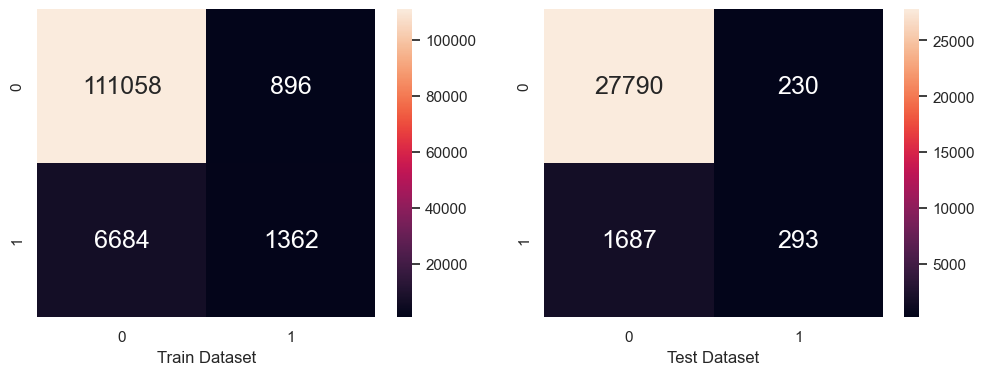

In [11]:
target_cols_dropped = ['age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse',
       ]
b = dec_tree(target_cols_dropped, 'SeriousDlqin2yrs', df_train1, df_test1, 5)

From the above values, the classification accuracy, true positive and negative rates have decreased after dropping columns with low correlation, while the false negative rate increased. Therefore, we conclude that the model performs better with all the columns.

## Exploring Boosting Classifier: AdaBoost

From the scikit learn documentations, boosting methods are ensemble methods where

>"...base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble."

Based on this, we hope to be able to decrease the bias of our data (which is imbalanced) to improved the model.

In [12]:
def ada_boost(x_name, y_name, df_train, df_test, learning_rate=1.0, show_info=True):
    # Prepare Test and Test
    X_train = df_train[x_name]
    X_test = df_test[x_name]
    y_train = df_train[[y_name]]
    y_test = df_test[[y_name]]

    # Create adaboost classifer object
    abc = AdaBoostClassifier(n_estimators=50,learning_rate=learning_rate)

    # Train Adaboost Classifer
    model = abc.fit(X_train, y_train.values.ravel())

    #Predict the response for test dataset
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    cm_df_train = confusion_matrix(y_train, y_train_pred)
    (train_TN, train_FP), (train_FN, train_TP) = cm_df_train
    (train_TPR, train_FPR, train_TNR, train_FNR) = positive_rate((train_TN, train_FP), (train_FN, train_TP))
    
    cm_df_test = confusion_matrix(y_test, y_test_pred)
    (test_TN, test_FP), (test_FN, test_TP) = cm_df_test
    (test_TPR, test_FPR, test_TNR, test_FNR) = positive_rate((test_TN, test_FP), (test_FN, test_TP))
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    if(show_info):
        # Check the Goodness of Fit (on Train Data)
        print("Predict {} using {} with learning rate = {}\n".format(y_name, x_name, learning_rate))
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Classification Accuracy \t:", train_score)
        print("True Positive Rate \t\t:", train_TPR)
        print("False Positive Rate \t\t:", train_FPR)
        print("True Negative Rate \t\t:", train_TNR)
        print("False Negative Rate \t\t:", train_FNR)
        print()

        # Check the Goodness of Fit (on Test Data)
        print("Goodness of Fit of Model \tTest Dataset")
        print("Classification Accuracy \t:", test_score)
        print("True Positive Rate \t\t:", test_TPR)
        print("False Positive Rate \t\t:", test_FPR)
        print("True Negative Rate \t\t:", test_TNR)
        print("False Negative Rate \t\t:", test_FNR)
        print()
        
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        sb.heatmap(cm_df_train,
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        sb.heatmap(cm_df_test, 
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        axes[0].set(xlabel="Train Dataset")
        axes[1].set(xlabel="Test Dataset")
        plt.show()
    
    return (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR)

In [13]:
arr = []
overfitting_arr = []
learning_r = [0.1, 0.25, 0.5, 0.75, 1.0]
for i in learning_r:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = ada_boost(target_cols, 'SeriousDlqin2yrs', df_train1, df_test1, i, show_info=False)
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Learning Rates", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Positive Rate by Learning Rate (AdaBoost)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Learning Rates", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Accuracy Against Adaboost Learning Rate", font=dict(size=14)))
fig.show()

**Since the positive rate for test data and accuracy for the `SeriousDlqin2yrs` of the test dataset is most optimal at learning rate 0.25, we will be using the adaboost with learning rate 0.25.**

Predict SeriousDlqin2yrs using ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with learning rate = 0.25

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9366916666666667
True Positive Rate 		: 0.17511807109122546
False Positive Rate 		: 0.008574950426067849
True Negative Rate 		: 0.9914250495739322
False Negative Rate 		: 0.8248819289087745

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.937
True Positive Rate 		: 0.16666666666666666
False Positive Rate 		: 0.008565310492505354
True Negative Rate 		: 0.9914346895074947
False Negative Rate 		: 0.8333333333333334



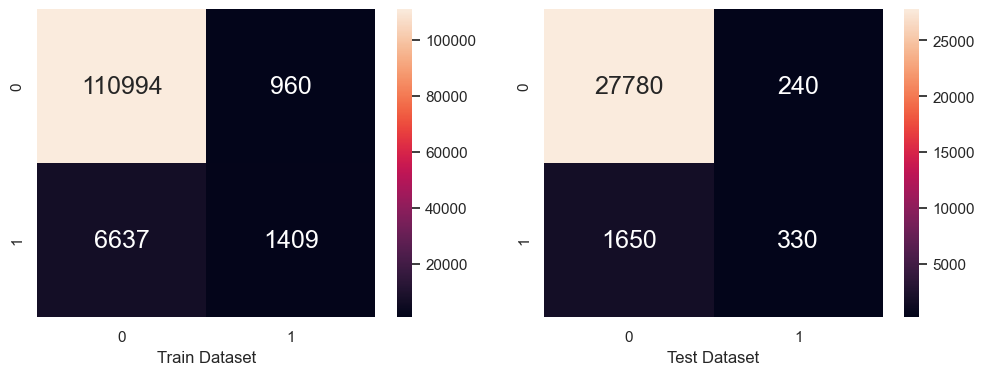

In [14]:
c = ada_boost(target_cols, "SeriousDlqin2yrs", df_train1, df_test1, 0.25)

**Dropping those columns with insignificant correlation (less than 0.1 with `SeriousDlqin2yrs`) to see if it improve the model**

Predict SeriousDlqin2yrs using ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] with learning rate = 0.25

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.93595
True Positive Rate 		: 0.17225950782997762
False Positive Rate 		: 0.009164478267860014
True Negative Rate 		: 0.99083552173214
False Negative Rate 		: 0.8277404921700223

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9364333333333333
True Positive Rate 		: 0.16313131313131313
False Positive Rate 		: 0.008922198429693077
True Negative Rate 		: 0.9910778015703069
False Negative Rate 		: 0.8368686868686869



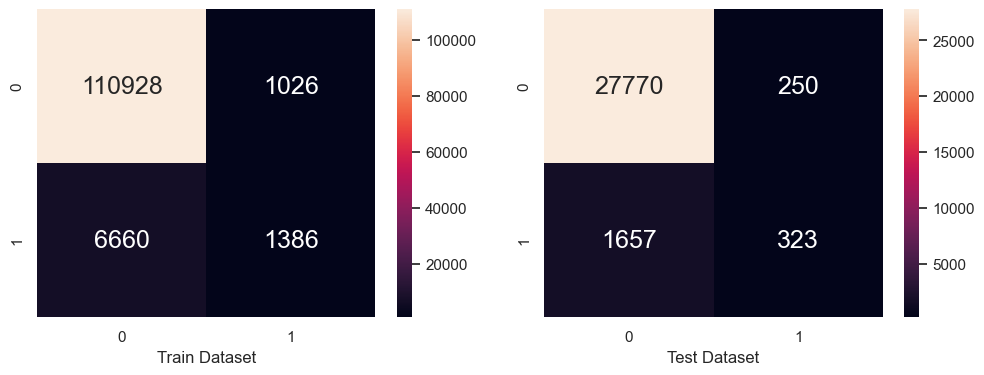

In [15]:
d = ada_boost(target_cols_dropped, "SeriousDlqin2yrs", df_train1, df_test1, 0.25)

## Conclusion
The result of the models above has a **biased outcome** with TPR ~16% and TNR ~99%. Hence, we decided to balance the data in attempt to create a model with a higher TPR and a model that is not biased towards 0 (TNR). 

## Handling Imbalanced Classes: NearMiss Undersampling

Firstly we will be trying undersampling with NearMiss algorithm to balance the data and use the new dataset to train the model. We will then use the same method to train model like what we did previously.

In [16]:
df_train4 = df_train1

X_train = df_train4[target_cols]
y_train = df_train4[["SeriousDlqin2yrs"]]

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X_train, y_train)

In [17]:
y.value_counts()

SeriousDlqin2yrs
No                  8046
Yes                 8046
dtype: int64

In [18]:
df_train5 = pd.concat([X, y], axis=1)

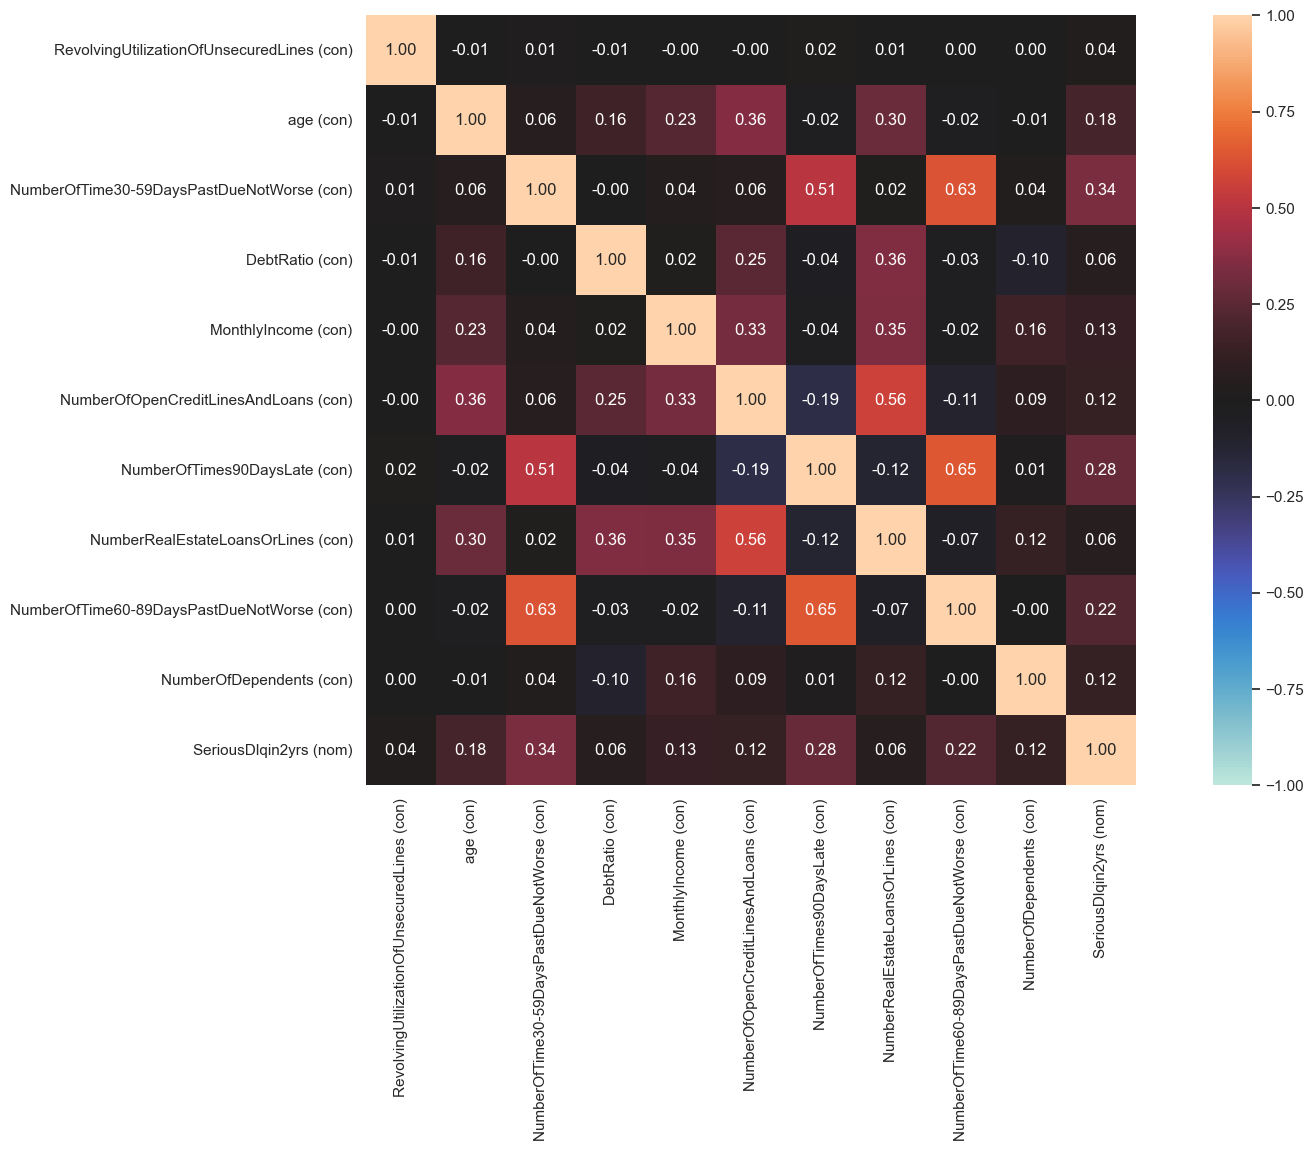

In [19]:
associations(df_train5,figsize=(20,10),mark_columns=True);

In [20]:
arr = []
overfitting_arr = []
depths = [i for i in range(2, 20)]
for i in depths:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = dec_tree(target_cols, 'SeriousDlqin2yrs', df_train5, df_test1, i, show_info=False)
    arr.append({"Max Depth": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Max Depth": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Max Depth", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Accuracy Rate by Max Depth - Decision Tree (Undersampling)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Max Depth", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Overfitting Curve Decision Tree (Undersampling)", font=dict(size=14)))
fig.show()

Predict SeriousDlqin2yrs using ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with max depth = 3

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7362043251304996
True Positive Rate 		: 0.6332339050459855
False Positive Rate 		: 0.16082525478498633
True Negative Rate 		: 0.8391747452150137
False Negative Rate 		: 0.3667660949540144

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8277
True Positive Rate 		: 0.6131313131313131
False Positive Rate 		: 0.15713775874375446
True Negative Rate 		: 0.8428622412562455
False Negative Rate 		: 0.38686868686868686



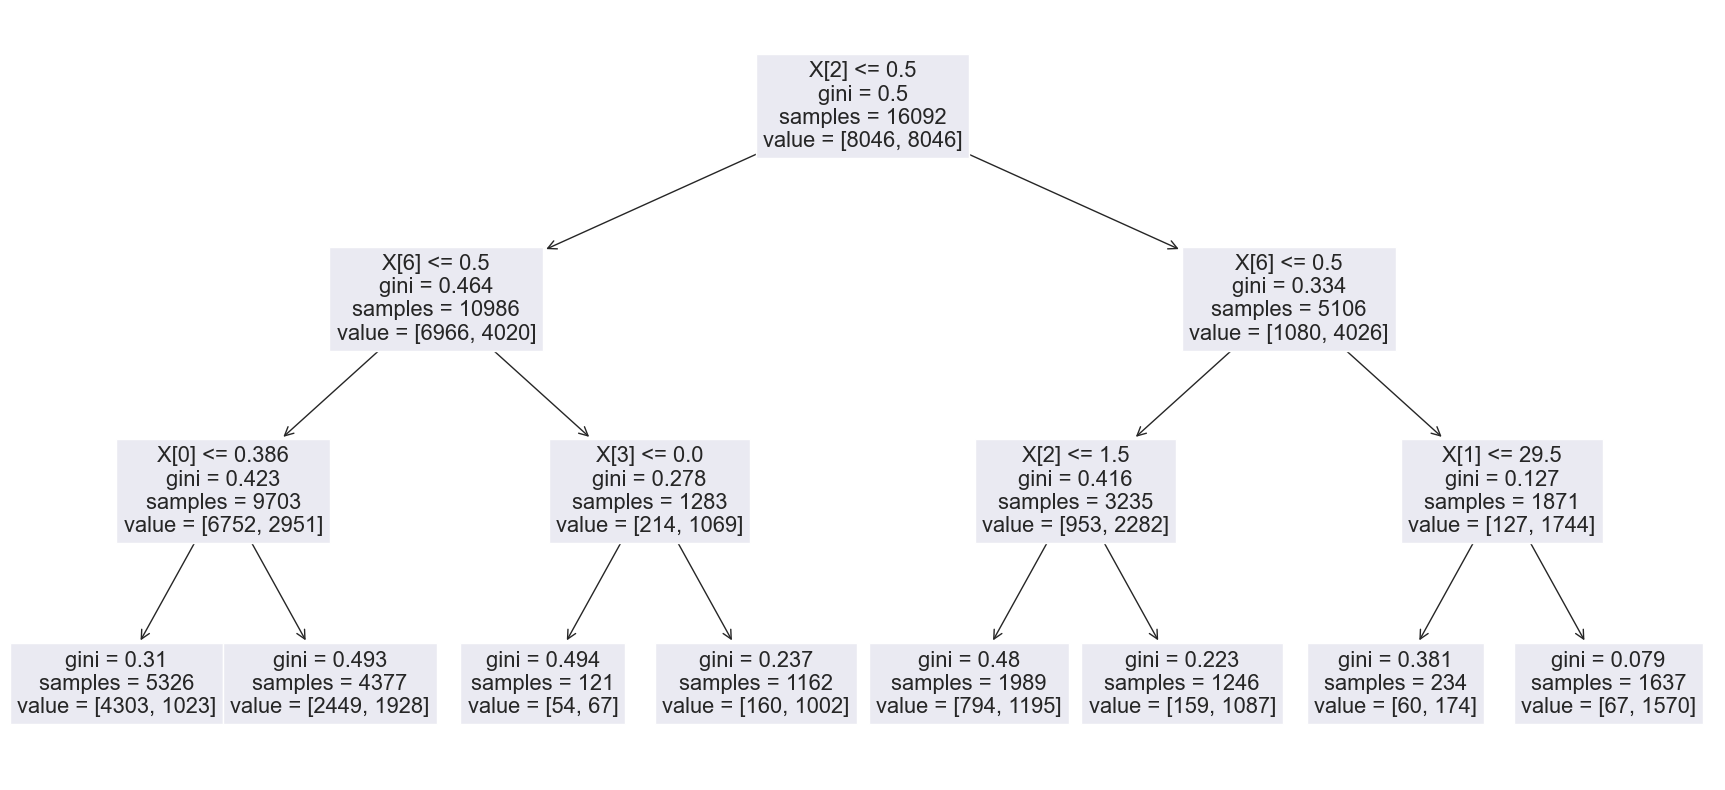

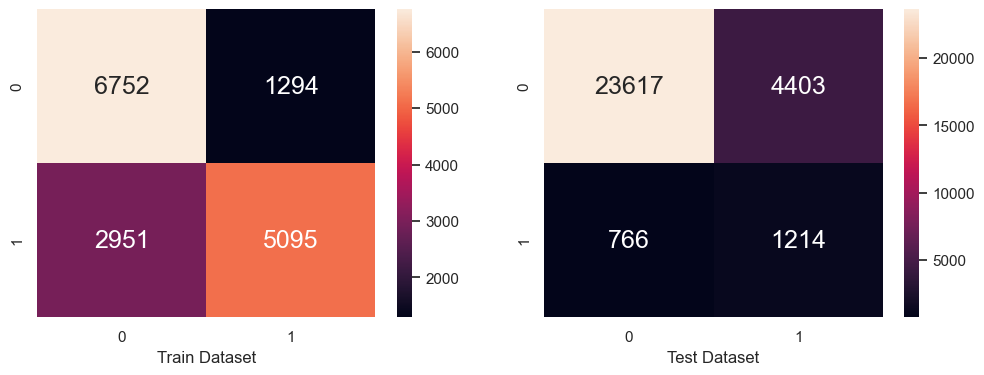

In [21]:
d = dec_tree(target_cols, 'SeriousDlqin2yrs', df_train5, df_test1, 3)

In [22]:
target_cols_nm_dropped = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

arr = []
overfitting_arr = []
depths = [i for i in range(2, 20)]
for i in depths:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = dec_tree(target_cols_nm_dropped, 'SeriousDlqin2yrs', df_train5, df_test1, i, show_info=False)
    arr.append({"Max Depth": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Max Depth": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Max Depth", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Accuracy Rate by Max Depth - Decision Tree (Undersampling after dropping insignificant corr)", font=dict(size=14)),width=900)
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Max Depth", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Overfitting Curve Decision Tree (Undersampling after dropping insignificant correlation)", font=dict(size=14)),width=900)
fig.show()

Predict SeriousDlqin2yrs using ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with max depth = 3

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7513671389510316
True Positive Rate 		: 0.6790952025851354
False Positive Rate 		: 0.17636092468307232
True Negative Rate 		: 0.8236390753169277
False Negative Rate 		: 0.32090479741486455

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8185333333333333
True Positive Rate 		: 0.6555555555555556
False Positive Rate 		: 0.16995003568879372
True Negative Rate 		: 0.8300499643112063
False Negative Rate 		: 0.34444444444444444



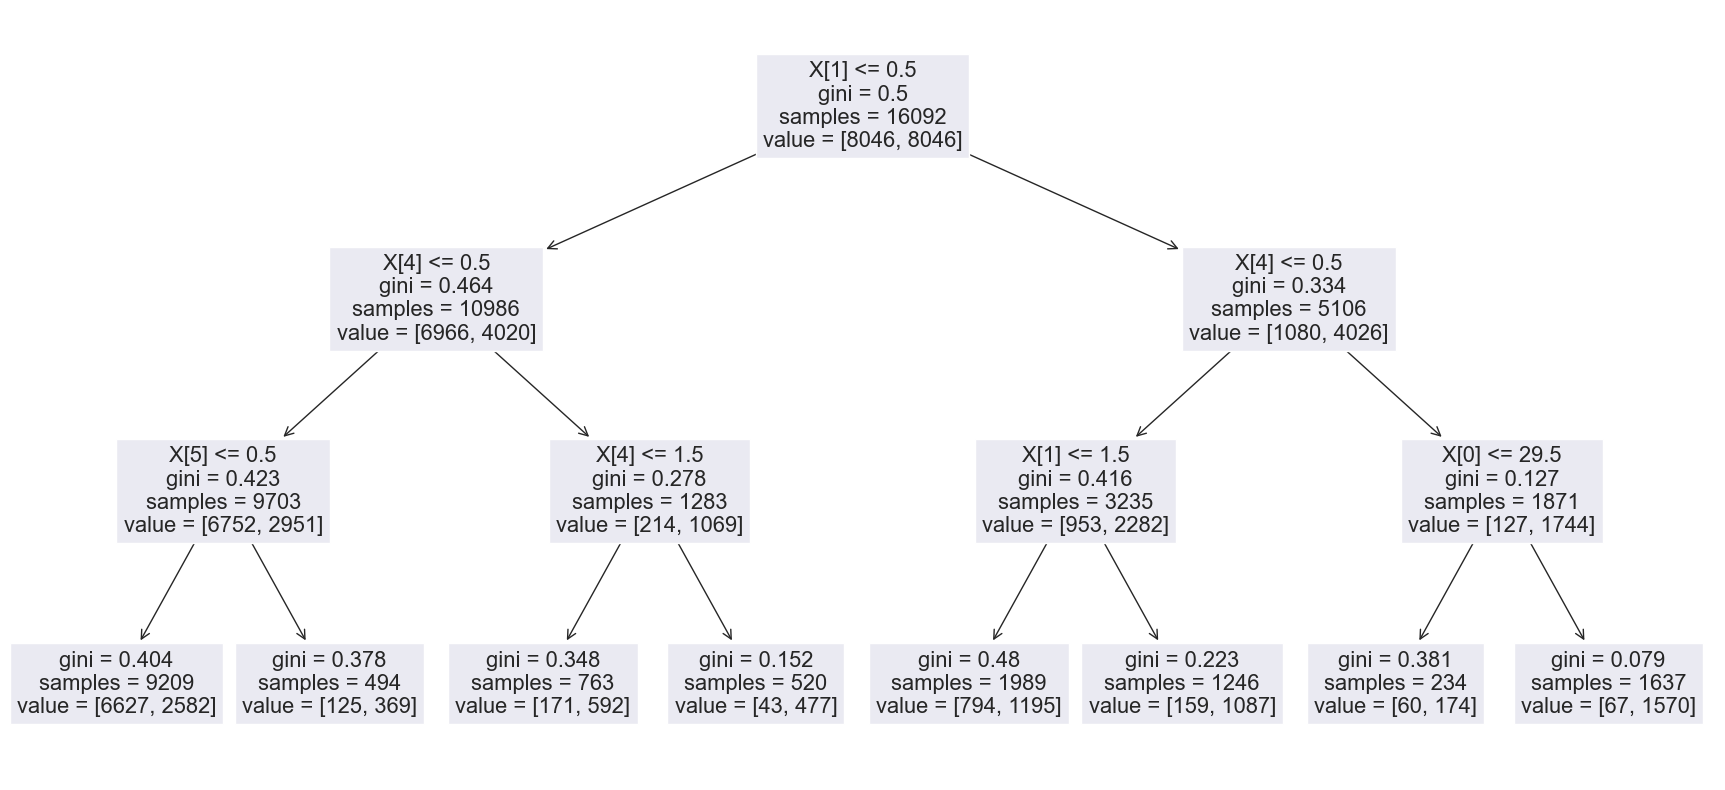

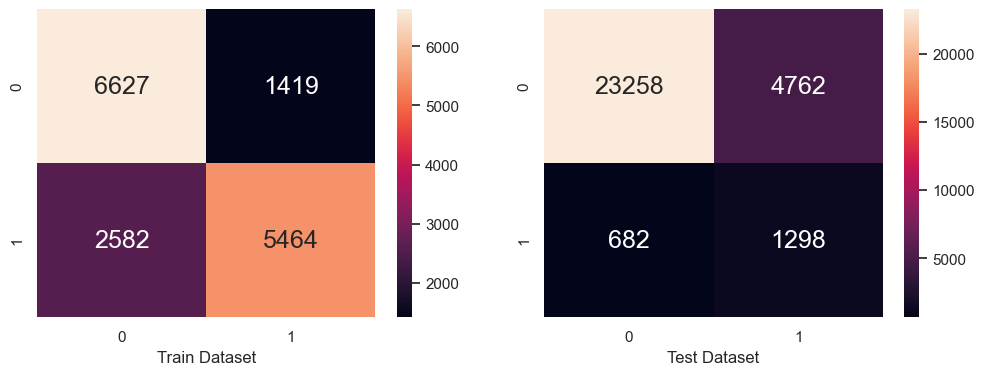

In [23]:
d = dec_tree(target_cols_nm_dropped, 'SeriousDlqin2yrs', df_train5, df_test1, 3)

In [24]:
arr = []
overfitting_arr = []
learning_r = [0.1, 0.25, 0.5, 0.75, 1.0]
for i in learning_r:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = ada_boost(target_cols, 'SeriousDlqin2yrs', df_train5, df_test1, i, show_info=False)
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Learning Rates", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Positive Rate by Learning Rate - AdaBoost (Undersampling)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Learning Rates", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Accuracy Against Adaboost Learning Rate (Undersampling)", font=dict(size=14)))
fig.show()

Predict SeriousDlqin2yrs using ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with learning rate = 0.1

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7939348744717872
True Positive Rate 		: 0.7224707929405916
False Positive Rate 		: 0.13460104399701714
True Negative Rate 		: 0.8653989560029829
False Negative Rate 		: 0.2775292070594084

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7696333333333333
True Positive Rate 		: 0.7090909090909091
False Positive Rate 		: 0.22608850820842255
True Negative Rate 		: 0.7739114917915775
False Negative Rate 		: 0.2909090909090909



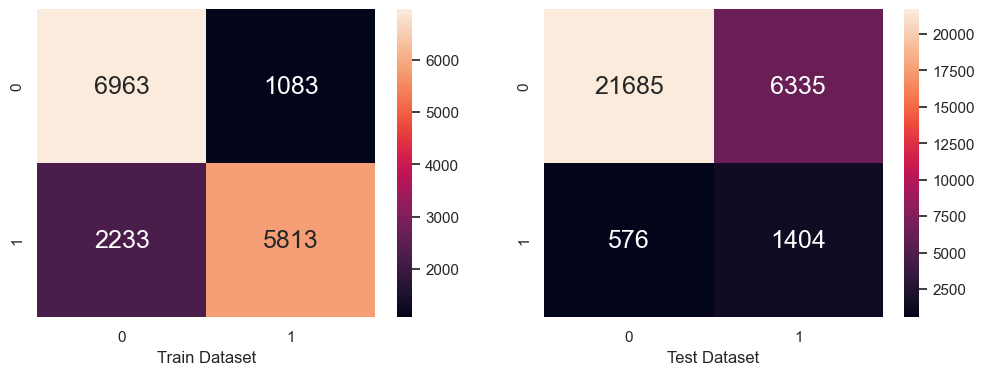

In [25]:
c = ada_boost(target_cols, "SeriousDlqin2yrs", df_train5, df_test1, 0.1)

In [26]:
arr = []
overfitting_arr = []
learning_r = [0.1, 0.25, 0.5, 0.75, 1.0]
for i in learning_r:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = ada_boost(target_cols_nm_dropped, 'SeriousDlqin2yrs', df_train5, df_test1, i, show_info=False)
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Learning Rates", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Positive Rate by Learning Rate - AdaBoost (Undersampling after dropping insignificant corr)", font=dict(size=14)),width=900)
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Learning Rates", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Accuracy Against Adaboost Learning Rate (Undersampling after dropping insignificant correlation)", font=dict(size=14)),width=900)
fig.show()

Predict SeriousDlqin2yrs using ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with learning rate = 0.1

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7779020631369624
True Positive Rate 		: 0.6850608998260005
False Positive Rate 		: 0.12925677355207557
True Negative Rate 		: 0.8707432264479245
False Negative Rate 		: 0.3149391001739995

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6862666666666667
True Positive Rate 		: 0.6656565656565656
False Positive Rate 		: 0.3122769450392577
True Negative Rate 		: 0.6877230549607424
False Negative Rate 		: 0.33434343434343433



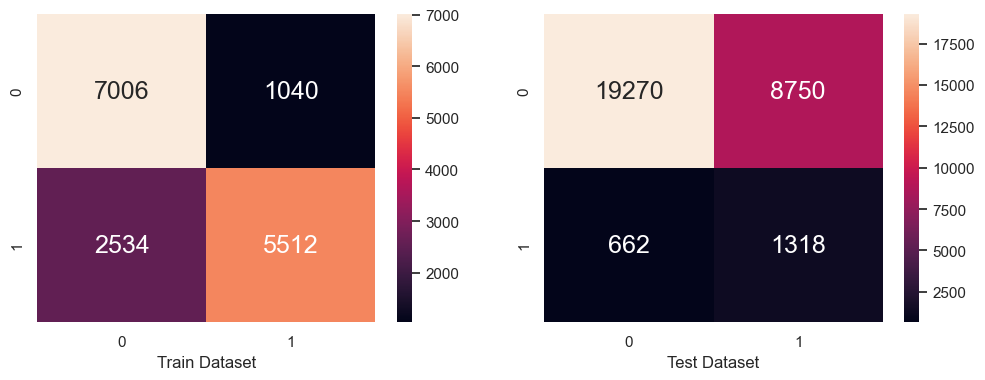

In [27]:
c = ada_boost(target_cols_nm_dropped, "SeriousDlqin2yrs", df_train5, df_test1, 0.1)

### Data Balancing using NearMiss Undersampling Conclusion 

Although the overall accuracy of the dataset has decreased, the positive rate for the individual classes has increased significantly.

According to the accuracy score, it would seem that the decision tree classification model performs better than AdaBoost model with balanced data.

To improve the overall accuracy of the data, we could try oversampling instead so that the rows of data are preserved.

## Handling the imbalanced classes: SMOTE Oversampling

In [28]:
X_train = df_train1[target_cols]
y_train = df_train1[["SeriousDlqin2yrs"]]

smote = SMOTE(sampling_strategy="all", random_state=37)

# transform the dataset
X, y = smote.fit_resample(X_train, y_train)

In [29]:
y.value_counts()

SeriousDlqin2yrs
No                  111954
Yes                 111954
dtype: int64

In [30]:
df_train6 = pd.concat([X, y], axis=1)

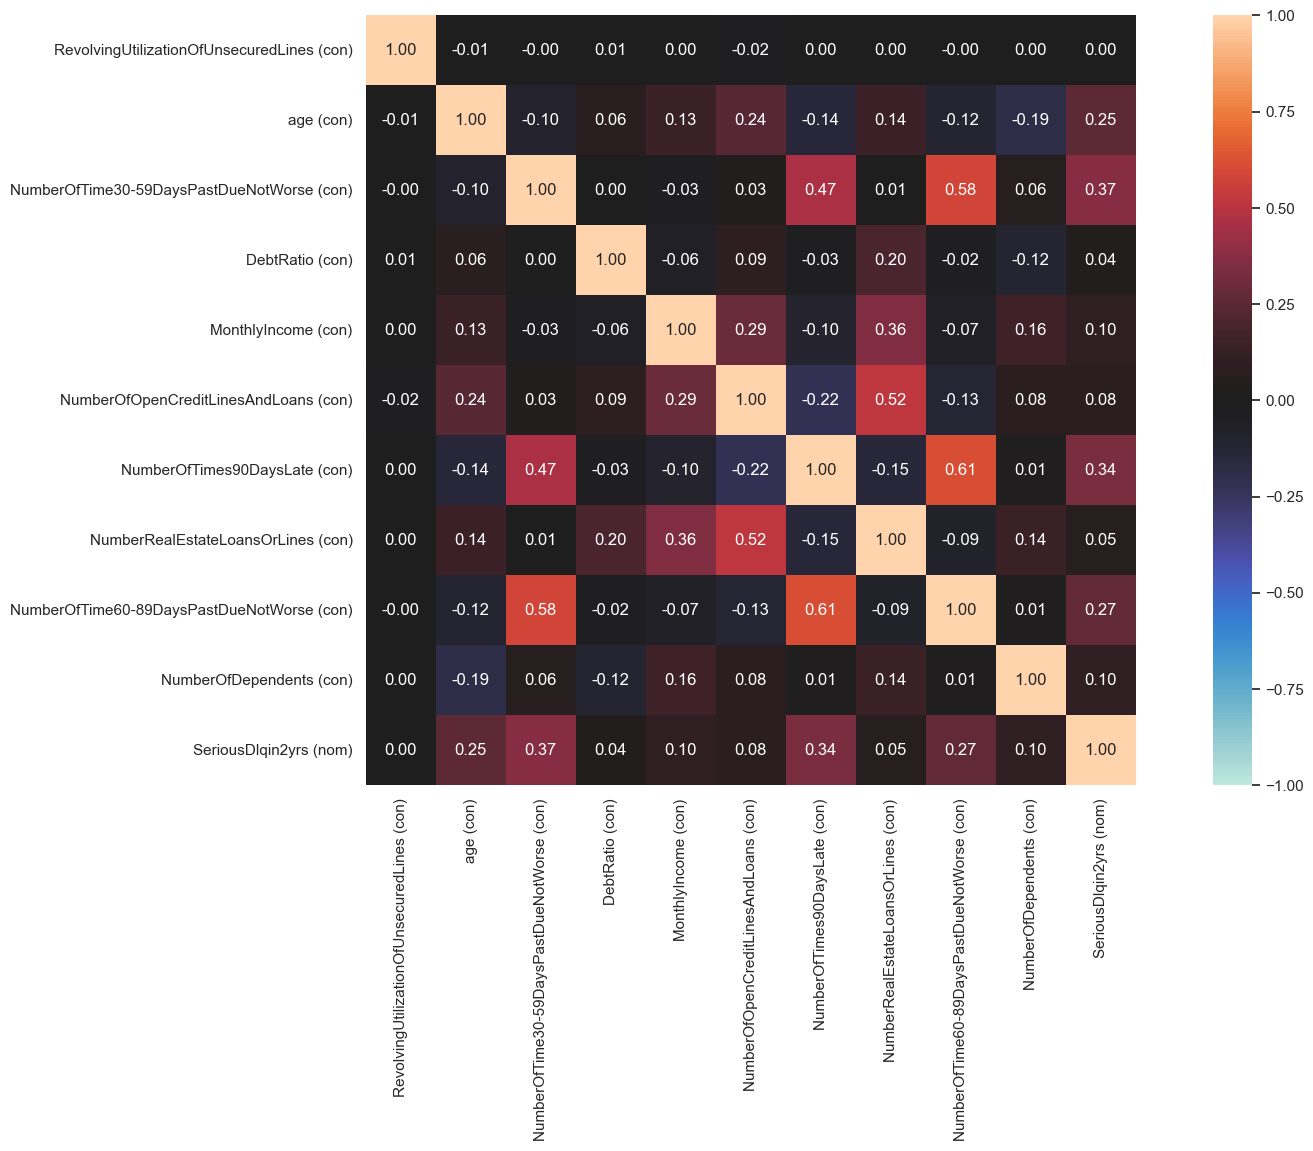

In [31]:
associations(df_train6,figsize=(20,10),mark_columns=True);

In [32]:
arr = []
overfitting_arr = []
depths = [i for i in range(2, 20)]
for i in depths:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = dec_tree(target_cols, 'SeriousDlqin2yrs', df_train6, df_test1, i, show_info=False)
    arr.append({"Max Depth": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Max Depth": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Max Depth", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Accuracy Rate by Max Depth (Oversampling)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Max Depth", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Overfitting Curve Decision Tree (Oversampling)", font=dict(size=14)))
fig.show()

Predict SeriousDlqin2yrs using ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with max depth = 3

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8523188095110492
True Positive Rate 		: 0.8729120888936528
False Positive Rate 		: 0.1682744698715544
True Negative Rate 		: 0.8317255301284456
False Negative Rate 		: 0.12708791110634726

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8185333333333333
True Positive Rate 		: 0.6555555555555556
False Positive Rate 		: 0.16995003568879372
True Negative Rate 		: 0.8300499643112063
False Negative Rate 		: 0.34444444444444444



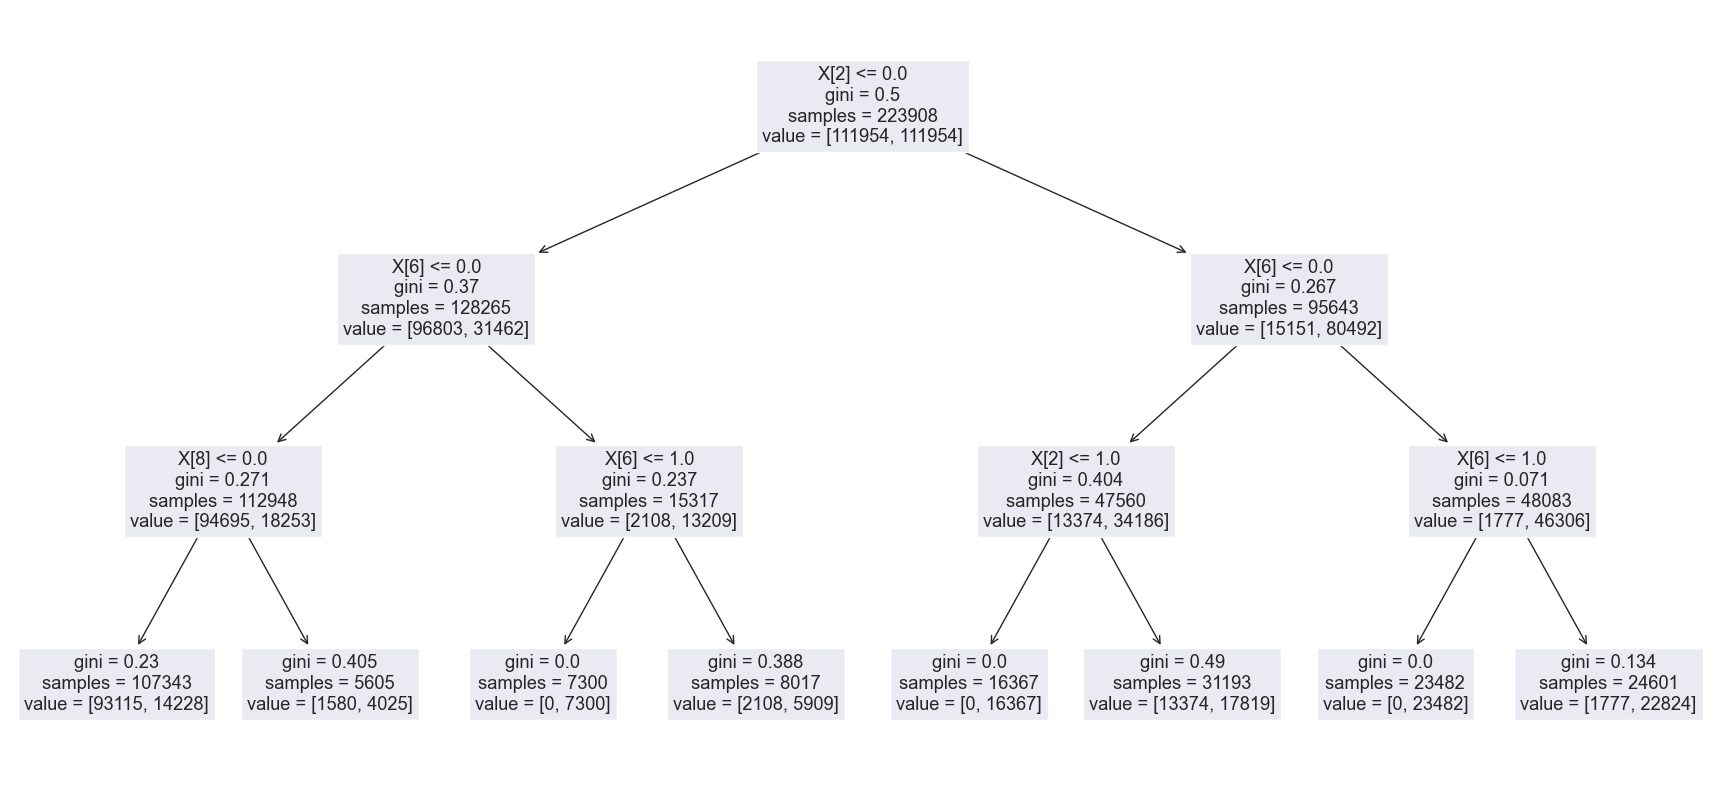

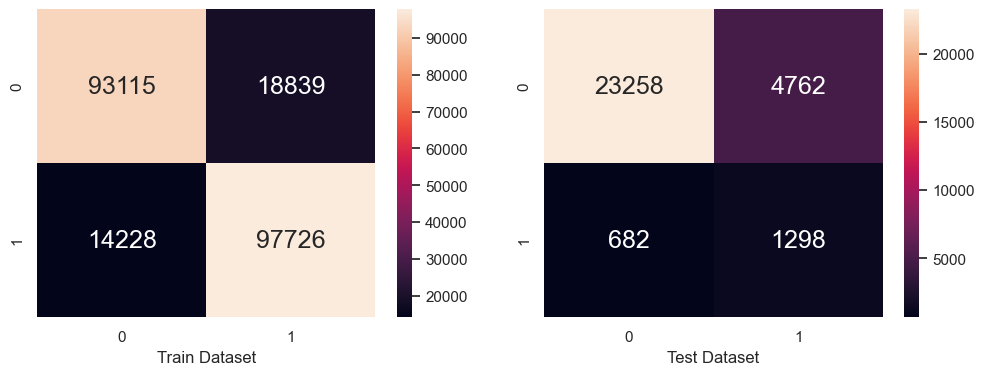

In [33]:
d = dec_tree(target_cols, 'SeriousDlqin2yrs', df_train6, df_test1, 3)

In [34]:
target_cols_s_dropped = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome','NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

arr = []
overfitting_arr = []
depths = [i for i in range(2, 20)]
for i in depths:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = dec_tree(target_cols_s_dropped, 'SeriousDlqin2yrs', df_train6, df_test1, i, show_info=False)
    arr.append({"Max Depth": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Max Depth": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Max Depth": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Max Depth", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Accuracy Rate by Max Depth - Decision Tree (Oversampling after dropping insignificant corr)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Max Depth", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Overfitting Curve Decision Tree (Oversampling after dropping insignificant correlation)", font=dict(size=14)))
fig.show()

Predict SeriousDlqin2yrs using ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with max depth = 3

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8523188095110492
True Positive Rate 		: 0.8729120888936528
False Positive Rate 		: 0.1682744698715544
True Negative Rate 		: 0.8317255301284456
False Negative Rate 		: 0.12708791110634726

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8185333333333333
True Positive Rate 		: 0.6555555555555556
False Positive Rate 		: 0.16995003568879372
True Negative Rate 		: 0.8300499643112063
False Negative Rate 		: 0.34444444444444444



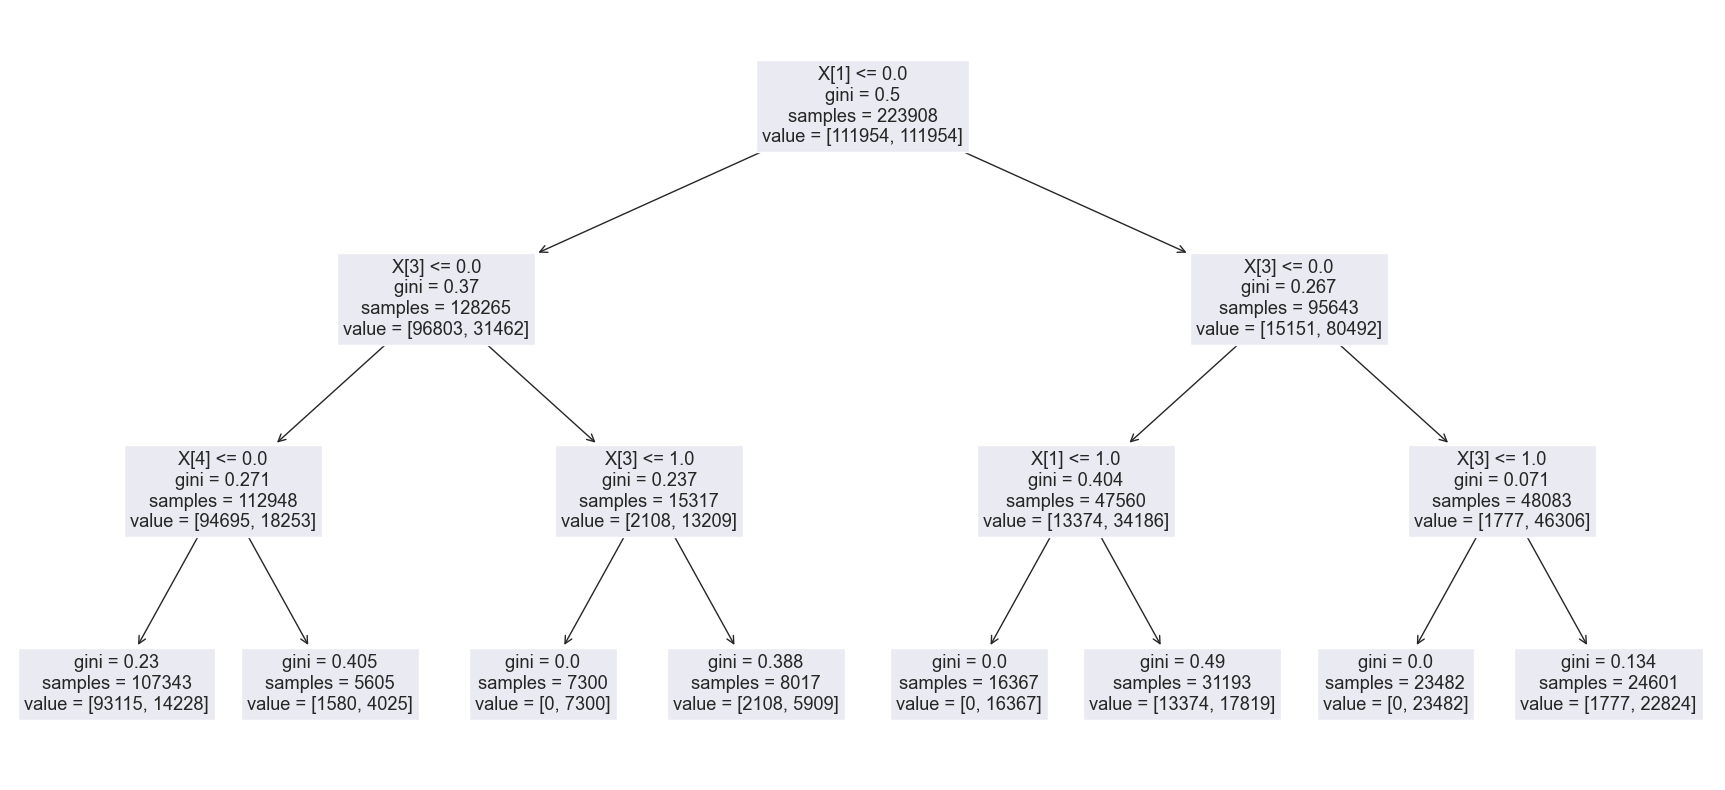

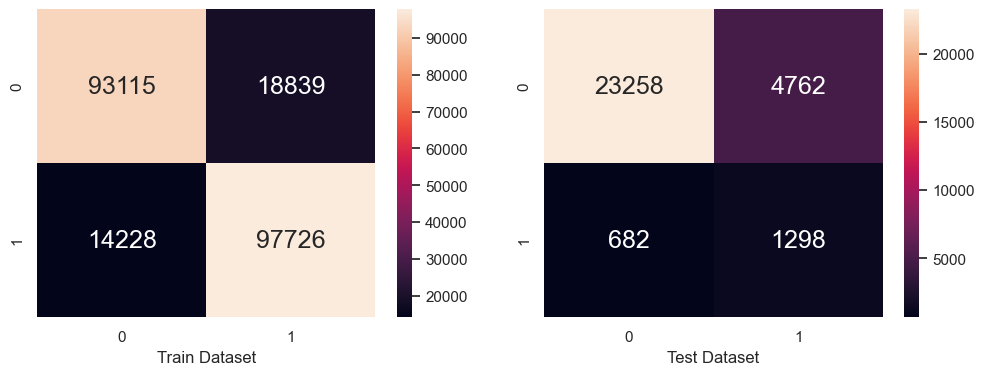

In [35]:
d = dec_tree(target_cols_s_dropped, 'SeriousDlqin2yrs', df_train6, df_test1, 3)

### Adaboost for oversampling

In [36]:
arr = []
overfitting_arr = []
learning_r = [0.1, 0.25, 0.5, 0.75, 1.0]
for i in learning_r:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = ada_boost(target_cols, 'SeriousDlqin2yrs', df_train6, df_test1, i, show_info=False)
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Learning Rates", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Positive Rate by Learning Rate - AdaBoost (Oversampling)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Learning Rates", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Accuracy Against Adaboost Learning Rate (Oversampling)", font=dict(size=14)))
fig.show()

Predict SeriousDlqin2yrs using ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with learning rate = 0.1

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8634751773049646
True Positive Rate 		: 0.8408096182360613
False Positive Rate 		: 0.11385926362613216
True Negative Rate 		: 0.8861407363738678
False Negative Rate 		: 0.15919038176393877

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8648666666666667
True Positive Rate 		: 0.5959595959595959
False Positive Rate 		: 0.11613133476088508
True Negative Rate 		: 0.8838686652391149
False Negative Rate 		: 0.40404040404040403



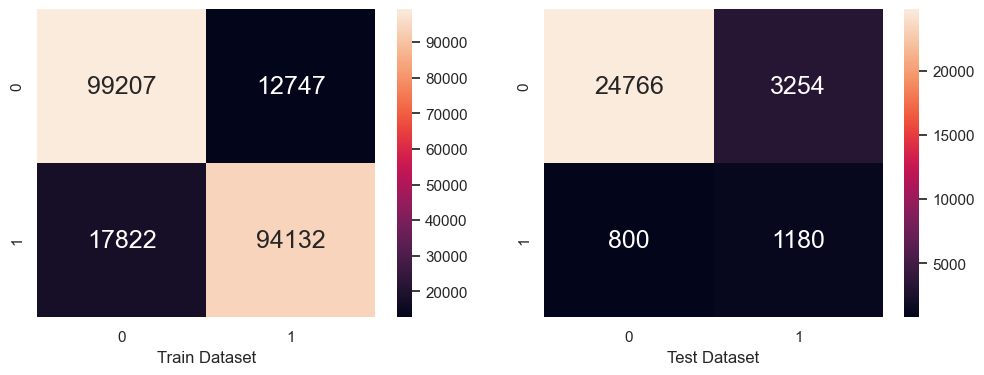

In [37]:
c = ada_boost(target_cols, "SeriousDlqin2yrs", df_train6, df_test1, 0.1)

In [38]:
arr = []
overfitting_arr = []
learning_r = [0.1, 0.25, 0.5, 0.75, 1.0]
for i in learning_r:
    (train_score, test_score, train_TPR, train_FPR, train_TNR, train_FNR, test_TPR, test_FPR, test_TNR, test_FNR) = ada_boost(target_cols_s_dropped, 'SeriousDlqin2yrs', df_train6, df_test1, i, show_info=False)
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TNR, "SeriousDlqin2yrs": "No"})
    arr.append({"Learning Rates": i, "Accuracy Rate": test_TPR, "SeriousDlqin2yrs": "Yes"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": train_score, "Dataset": "Train"})
    overfitting_arr.append({"Learning Rates": i, "Accuracy": test_score, "Dataset": "Test"})


fig = px.line(pd.DataFrame(arr), x="Learning Rates", y="Accuracy Rate", color='SeriousDlqin2yrs')
fig.update_layout(title=dict(text="Test Dataset Positive Rate by Learning Rate - AdaBoost (Oversampling after dropping insignificant corr)", font=dict(size=14)))
fig.show()

fig = px.line(pd.DataFrame(overfitting_arr), x="Learning Rates", y="Accuracy", color='Dataset')
fig.update_layout(title=dict(text="Accuracy Against Adaboost Learning Rate (Oversampling after dropping insignificant correlation)", font=dict(size=14)))
fig.show()

Predict SeriousDlqin2yrs using ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] with learning rate = 0.1

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8516712221090805
True Positive Rate 		: 0.8395055111920967
False Positive Rate 		: 0.13616306697393574
True Negative Rate 		: 0.8638369330260642
False Negative Rate 		: 0.16049448880790324

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8419
True Positive Rate 		: 0.6005050505050505
False Positive Rate 		: 0.14104211277658815
True Negative Rate 		: 0.8589578872234118
False Negative Rate 		: 0.3994949494949495



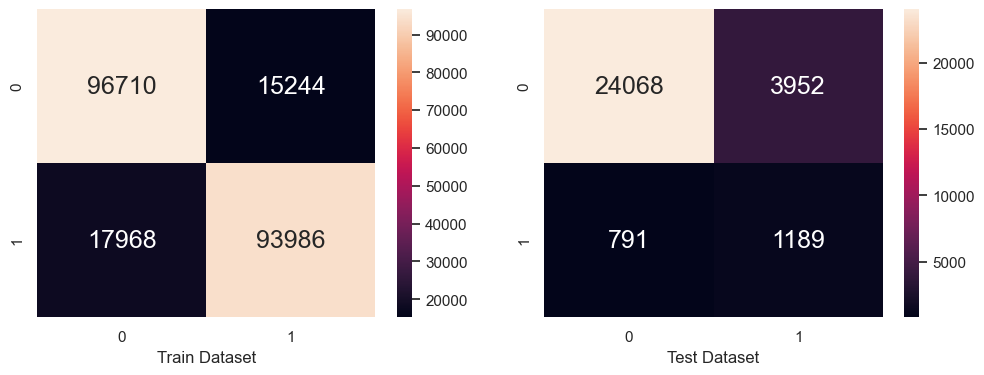

In [39]:
d = ada_boost(target_cols_s_dropped, "SeriousDlqin2yrs", df_train6, df_test1, 0.1)

### We decided to choose undersampling as the TPR which is the recall score is higher than oversampling's TPR for all the models. In our case, TPR is more important as False Negative is of higher concern than False Positive. It is important that we identify the customers that have a serious delinquency because it doesn't matter whether we raise a false alarm, but the actual positive cases should not go undetected.

We chose **adaboost model with all the variables, learning rate of 0.1** as it has a highest TPR and least biased outcome with both TPR and TNR ~70% and ~77% respectively among the four models under undersampling.